In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
# import the data

filepath = '/Users/thananpornsethjinda/Desktop/internship/ml/regression/concrete/concrete_data.csv'

df = pd.read_csv(filepath)

### intial review of the data set

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


### sanity check

In [7]:
df.shape

(1030, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [66]:
df.duplicated().sum()

np.int64(25)

#### EDA

In [ ]:
df.describe() # have to carry out feature scaling 

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


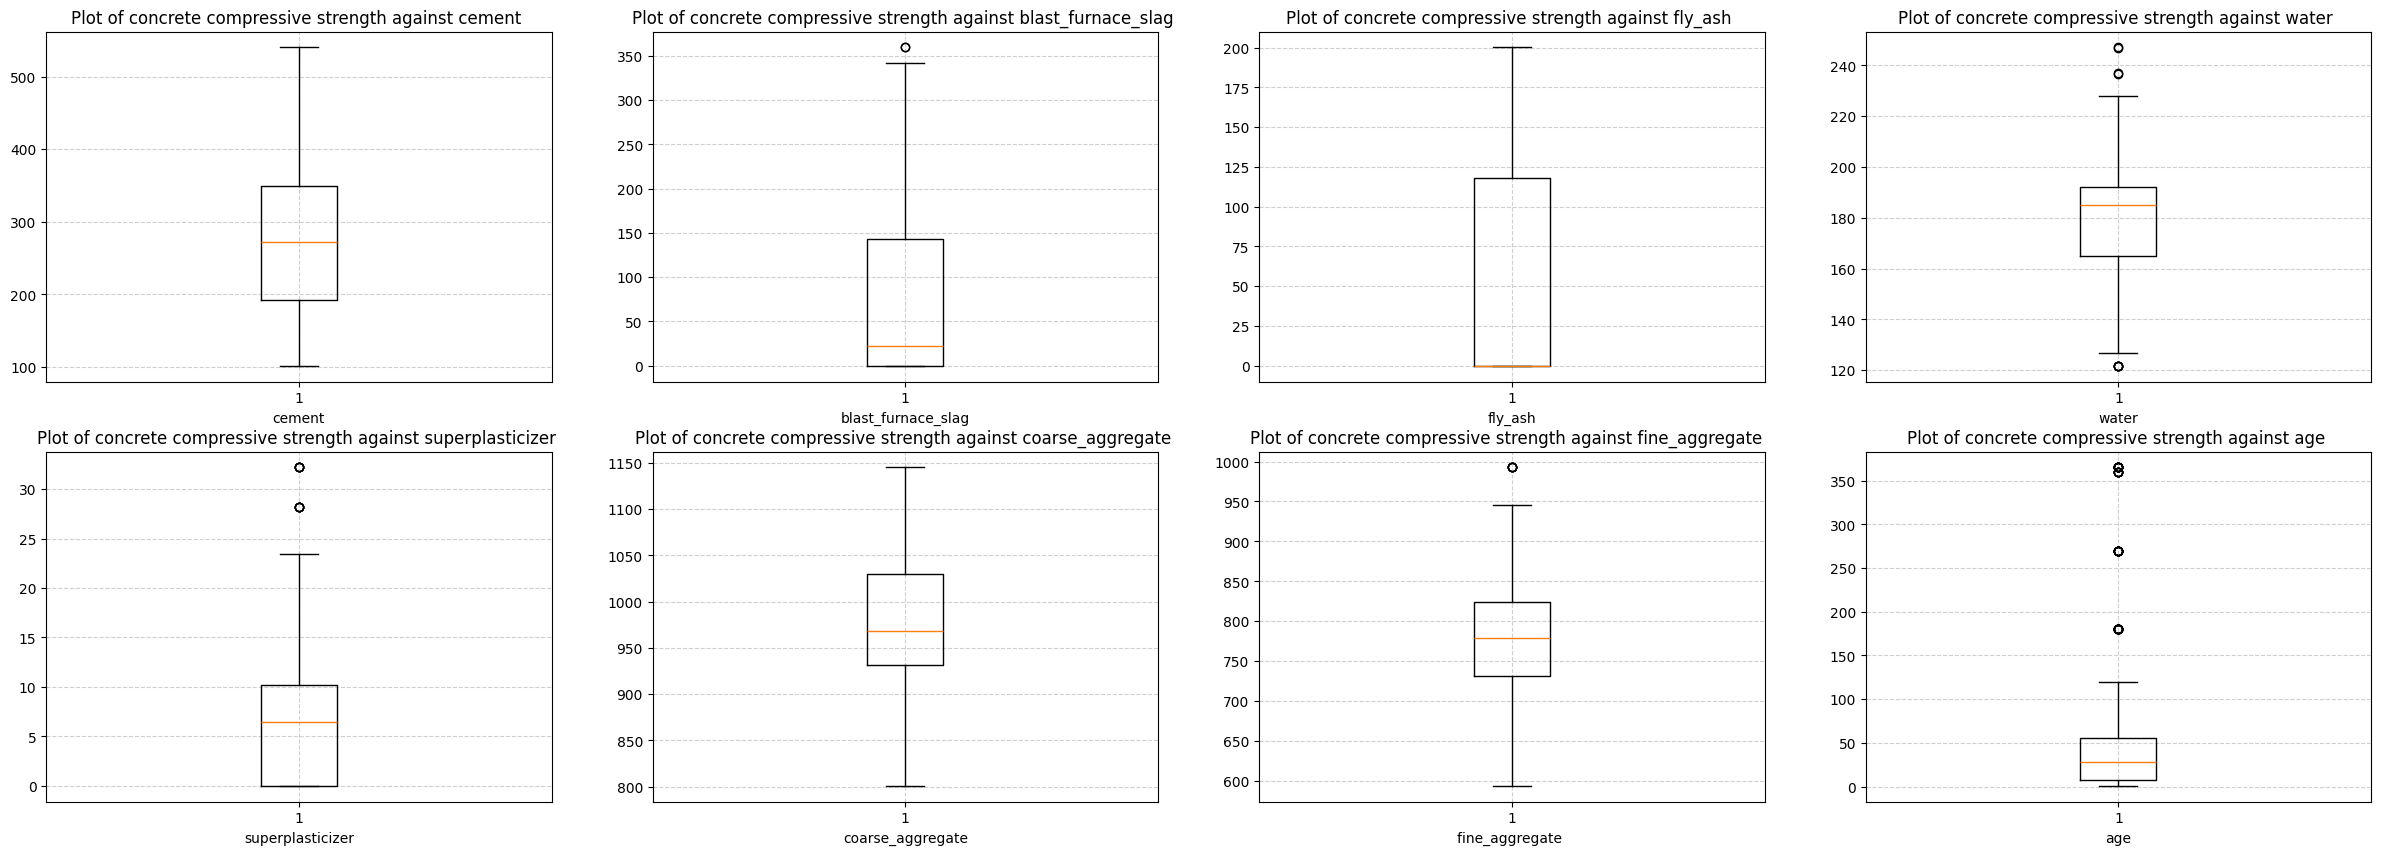

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

column_number = 0

for i in range(2):
    for j in range(4): 
        axes[i][j].boxplot(df.iloc[:, column_number])
        axes[i][j].grid(True, linestyle='--', alpha=0.6)
        axes[i][j].set_title(f'Plot of concrete compressive strength against {df.columns[column_number]}')
        axes[i][j].set_xlabel(df.columns[column_number])
        column_number += 1

plt.show()

In [28]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

##### NOTE: there exists outliers and also there is a trailing white space for one of the column names 

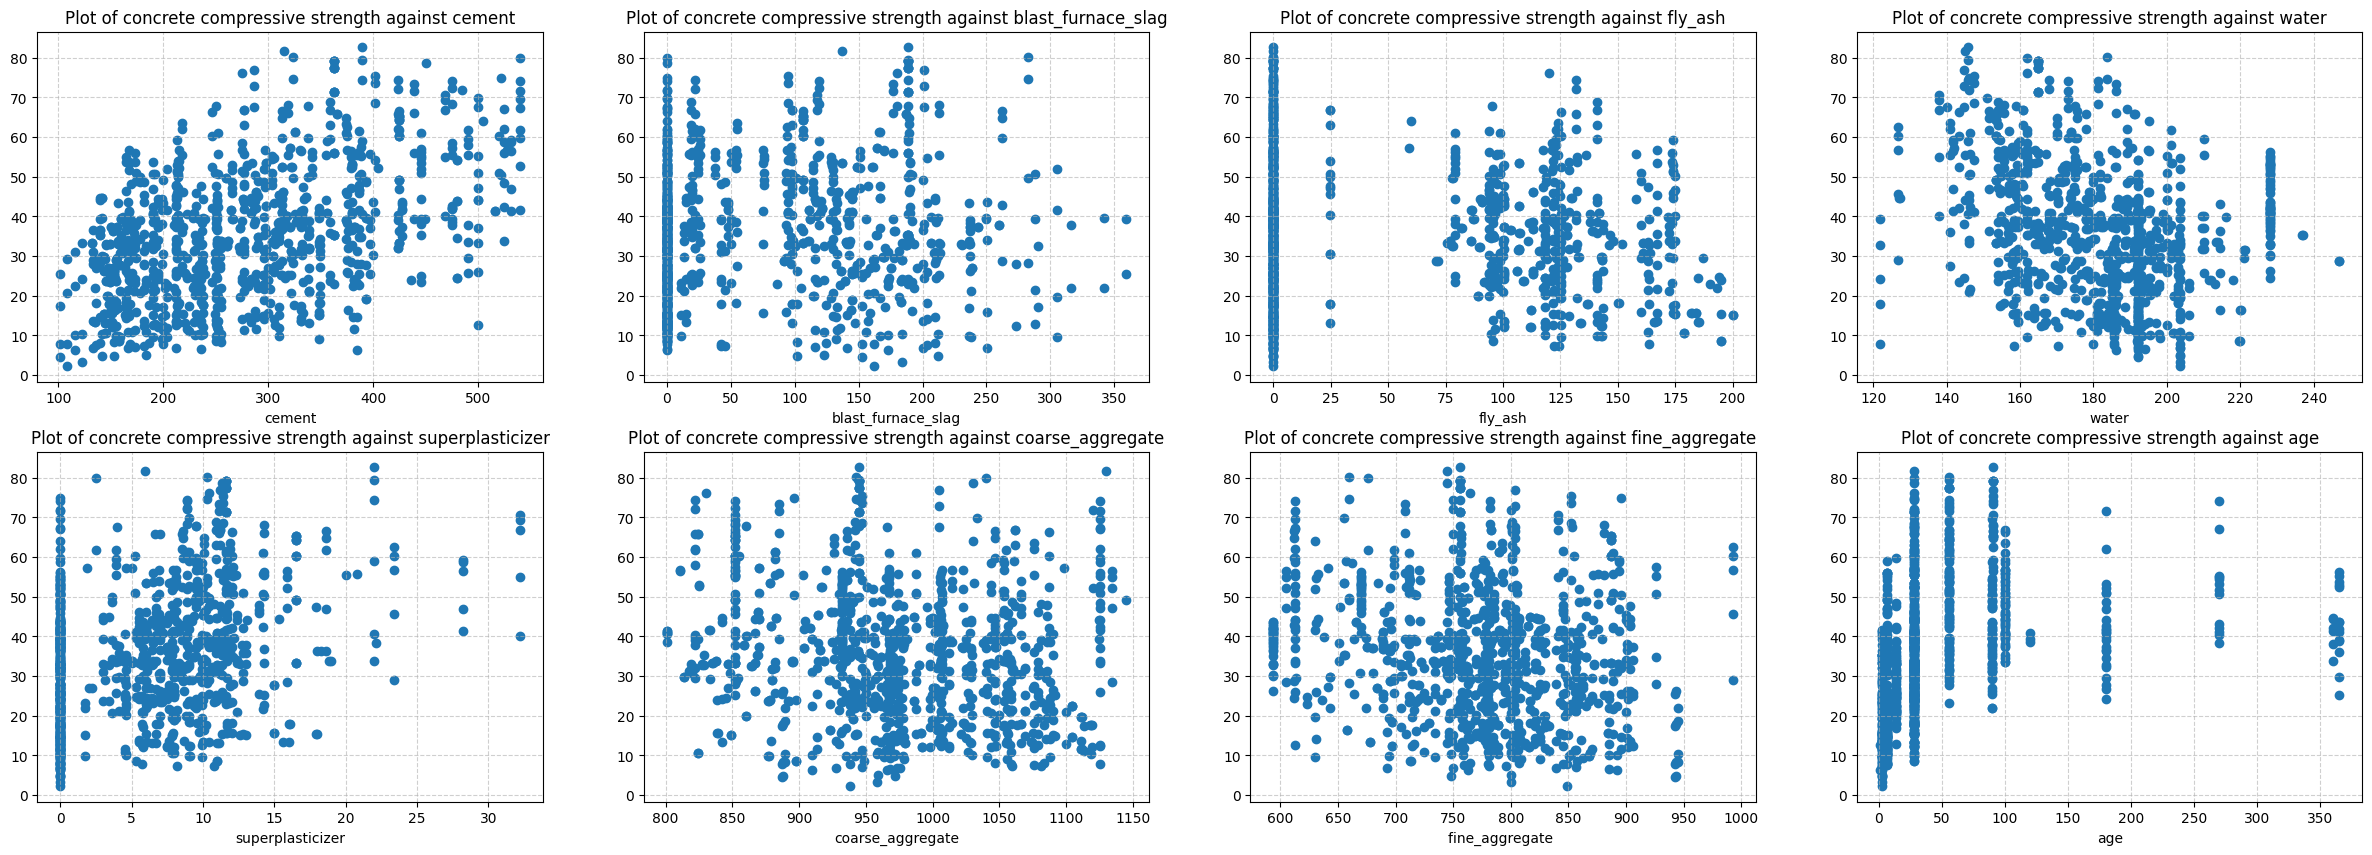

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

column_number = 0

for i in range(2):
    for j in range(4): 
        axes[i][j].scatter(df.iloc[:, column_number], df.iloc[:, 8])
        axes[i][j].grid(True, linestyle='--', alpha=0.6)
        axes[i][j].set_title(f'Plot of concrete compressive strength against {df.columns[column_number]}')
        axes[i][j].set_xlabel(df.columns[column_number])
        column_number += 1

plt.show()

*positive correlations*

cement
superplasticizer 
slag
age

*negative correlations*

coarse aggregate 
fine aggregate 
water 
fly ash 



<Axes: >

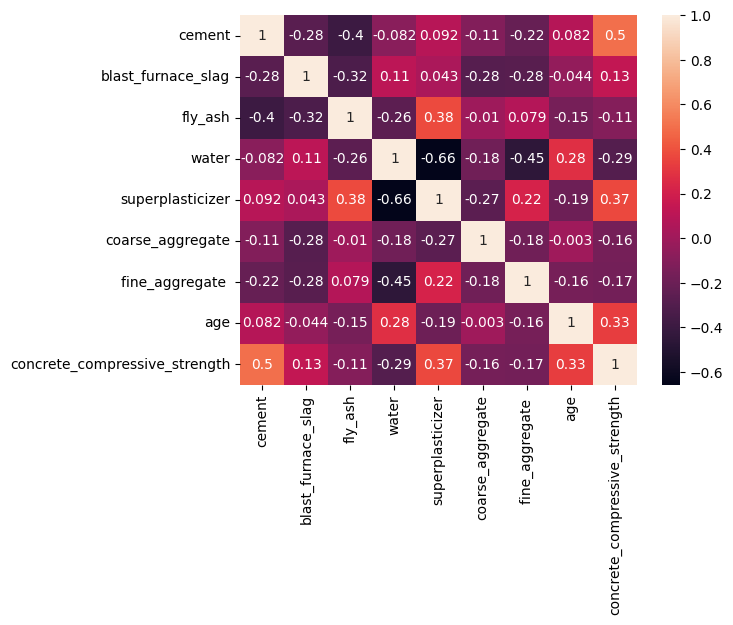

In [ ]:
sns.heatmap(df.corr(), annot=True)

### Data cleaning

In [63]:
## data cleaning frame work 

def clean_dataframe(df: pd.DataFrame, verbose: bool = True) -> pd.DataFrame:
    df = df.copy()

    # log helper
    def log(msg):
        if verbose:
            print(f"[INFO] {msg}")

    # 1. standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    log("Standardized column names.")

    # 2. remove exact duplicates
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        df.drop_duplicates(inplace=True)
        log(f"Removed {dup_count} duplicate rows.")

    # 3. trim and lowercase all string (object) values
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].astype(str).str.strip().str.lower()
    log("Standardized string columns (lowercase + trimmed).")

    # 4. detect missing values (including blanks and placeholders)
    placeholder_values = ['n/a', 'na', '--', '-', 'none', 'null', '', 'nan']
    df.replace(placeholder_values, np.nan, inplace=True)
    null_report = df.isnull().sum()
    null_report = null_report[null_report > 0]
    if not null_report.empty:
        log(f"Missing values found in columns:\n{null_report}")

    # 5. flag constant columns
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    if constant_cols:
        log(f"Constant columns (consider removing): {constant_cols}")

    # 6. flag high cardinality categorical columns
    high_card_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() > 100]
    if high_card_cols:
        log(f"High-cardinality columns (consider encoding strategies): {high_card_cols}")

    # 7. detect numeric outliers using IQR
    num_cols = df.select_dtypes(include=np.number).columns
    outlier_report = {}
    for col in num_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
        if outliers > 0:
            outlier_report[col] = outliers
    if outlier_report:
        log(f"Potential numeric outliers detected:\n{outlier_report}")
    
    # 8. convert applicable columns to category
    for col in df.select_dtypes(include='object'):
        n_unique = df[col].nunique()
        if n_unique < len(df) * 0.05:
            df[col] = df[col].astype('category')
    log("Converted suitable object columns to category dtype.")

    log("Data cleaning complete.")
    return df

In [64]:
cleaned = clean_dataframe(df)

[INFO] Standardized column names.
[INFO] Removed 25 duplicate rows.
[INFO] Standardized string columns (lowercase + trimmed).
[INFO] Potential numeric outliers detected:
{'blast_furnace_slag': np.int64(2), 'water': np.int64(15), 'superplasticizer': np.int64(10), 'fine_aggregate': np.int64(5), 'age': np.int64(59), 'concrete_compressive_strength': np.int64(8)}
[INFO] Converted suitable object columns to category dtype.
[INFO] Data cleaning complete.


### data transformation and feature scaling

In [85]:
from sklearn.preprocessing import StandardScaler

numeric_columns = cleaned.columns[:len(df.columns)-1]

dataframe = cleaned[numeric_columns]

def featureScaler(dataframe: pd.DataFrame) -> np.ndarray:

    """feature scaler for numeric columns"""

    scale = StandardScaler()

    scale.fit(dataframe)

    scaled_inputs = scale.transform(dataframe)

    return scaled_inputs

scaled_features = featureScaler(dataframe)


### finally! multiple linear regression

In [89]:
#input is:
X = scaled_features

#output is: 
y = cleaned.concrete_compressive_strength

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)


In [92]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

y_pred = model.predict(X_test)

print(f"MSE is {mean_squared_error(y_test, y_pred)}")

print(f"RMSE is {root_mean_squared_error(y_test, y_pred)}")

print(f"r^2 is {r2_score(y_test, y_pred)}")

MSE is 126.16199205625101
RMSE is 11.2321855422821
r^2 is 0.5644991091885495
